In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_train = pd.read_csv('./processed_data/df_train.csv')
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)
print(X_train_norm)
X_train_norm.shape, y_train.shape

[[0.00000000e+00 2.05947772e-05 0.00000000e+00 ... 8.59808263e-05
  0.00000000e+00 5.25182501e-05]
 [8.73616773e-04 1.11211797e-03 6.79627646e-04 ... 6.19061949e-03
  6.73551863e-04 4.72664251e-04]
 [9.38329127e-04 1.02973886e-04 1.02973886e-04 ... 2.57942479e-04
  0.00000000e+00 0.00000000e+00]
 ...
 [2.58849414e-04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  6.73551863e-04 7.87773751e-04]
 [2.26493238e-04 9.26764972e-04 1.09152319e-03 ... 3.26727140e-03
  6.73551863e-04 4.72664251e-04]
 [0.00000000e+00 2.05947772e-05 2.05947772e-05 ... 4.29904131e-05
  0.00000000e+00 8.40292001e-04]]


((8399, 140), (8399,))

In [3]:
df_valid = pd.read_csv('./processed_data/df_valid.csv')
X_valid = df_valid.drop('label', axis=1)
y_valid = df_valid['label']

# transform validation data
X_valid_norm = norm.transform(X_valid)

print(X_valid_norm)
X_valid_norm.shape, y_valid.shape

[[4.85342652e-05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.24517288e-04 7.35255501e-04]
 [3.23561768e-04 4.11895543e-05 2.05947772e-05 ... 3.43923305e-04
  0.00000000e+00 1.52302925e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.26493238e-04 0.00000000e+00 0.00000000e+00 ... 1.28971239e-04
  0.00000000e+00 2.62591250e-04]
 [0.00000000e+00 2.26542549e-04 1.02973886e-04 ... 9.02798676e-04
  2.24517288e-04 6.30219001e-04]
 [0.00000000e+00 0.00000000e+00 2.05947772e-05 ... 0.00000000e+00
  0.00000000e+00 8.92810252e-04]]


((2800, 140), (2800,))

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=200, n_jobs=-1)
svm_clf = SVC(C=10000)
log_clf = LogisticRegression(C=10000, max_iter=10000)

voting_clf = VotingClassifier(
    estimators=[('rf', rnd_clf), ('svm', svm_clf), ('log', log_clf)],
    voting='hard')

In [5]:
# validating
from sklearn.metrics import accuracy_score

for clf in (rnd_clf, svm_clf, log_clf, voting_clf):
    clf.fit(X_train_norm, y_train)
    y_pred = clf.predict(X_valid_norm)
    print(clf.__class__.__name__, accuracy_score(y_valid, y_pred))

RandomForestClassifier 0.9796428571428571
SVC 0.9485714285714286
LogisticRegression 0.9246428571428571
VotingClassifier 0.9607142857142857


In [6]:
df_test = pd.read_csv('./processed_data/df_test.csv')
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

# transform testing data
X_test_norm = norm.transform(X_test)

print(X_test_norm)
X_test_norm.shape, y_test.shape

[[2.91205591e-04 1.23568663e-04 1.02973886e-04 ... 7.73827436e-04
  2.24517288e-04 2.04821175e-03]
 [6.47123536e-05 6.17843315e-05 6.17843315e-05 ... 8.59808263e-05
  0.00000000e+00 6.30219001e-04]
 [0.00000000e+00 1.44163440e-04 2.05947772e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.61780884e-04 2.05947772e-05 0.00000000e+00 ... 0.00000000e+00
  6.73551863e-04 4.72664251e-04]
 [3.55917945e-04 0.00000000e+00 0.00000000e+00 ... 8.59808263e-05
  0.00000000e+00 2.62591250e-04]
 [2.47524752e-03 0.00000000e+00 0.00000000e+00 ... 1.28971239e-04
  7.40907050e-03 8.71802952e-03]]


((2800, 140), (2800,))

In [7]:
# testing
for clf in (rnd_clf, svm_clf, log_clf, voting_clf):
    clf.fit(X_train_norm, y_train)
    y_pred = clf.predict(X_test_norm)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.9764285714285714
SVC 0.9432142857142857
LogisticRegression 0.9282142857142858
VotingClassifier 0.9617857142857142


In [8]:
# visualisation of results
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ['.html', '.java', '.py', '.c', '.cpp', '.rb', '.php']
y_pred = voting_clf.predict(X_test_norm)
confusion_matrix = confusion_matrix(y_test, y_pred, labels=labels)
print(confusion_matrix)

[[396   1   0   0   3   0   2]
 [  5 388   1   0   1   0   1]
 [  8   0 376   1   1   0   0]
 [  4   0   1 397   5   0   0]
 [  6   0   0  30 362   0   0]
 [  6   0   1   1   0 384   1]
 [ 26   1   0   1   0   0 390]]


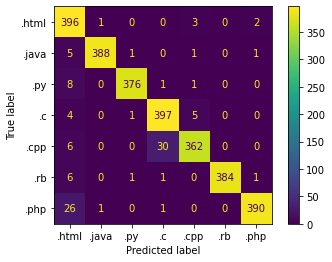

In [9]:
display = ConfusionMatrixDisplay(confusion_matrix, display_labels=labels)
display.plot()

In [10]:
# to check count
from collections import Counter

print(Counter(y_pred))
print(Counter(y_test))

Counter({'.html': 451, '.c': 430, '.php': 394, '.java': 390, '.rb': 384, '.py': 379, '.cpp': 372})
Counter({'.php': 418, '.c': 407, '.html': 402, '.cpp': 398, '.java': 396, '.rb': 393, '.py': 386})
